# Assignment 8

In [1]:
# import our usual things
#####%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

## Geopandas

In [2]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [3]:
gdf_councils

OBJECTID_1 District        Council_me   ShapeSTArea  ShapeSTLength  \
0         811        5   Vanna Pianfetti  1.838498e+08  211060.175261   
1         812        3    Daniel Iniguez  2.009197e+08  144362.359386   
2         813        1   Davion Williams  1.078965e+08   83420.727939   
3         814        4  Michael Foellmer  1.049800e+08   77363.320814   
4         815        2       Alicia Beck  5.164512e+07   62243.277115   

                                            geometry  
0  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

In [4]:
gdf_councils.head()

OBJECTID_1 District        Council_me   ShapeSTArea  ShapeSTLength  \
0         811        5   Vanna Pianfetti  1.838498e+08  211060.175261   
1         812        3    Daniel Iniguez  2.009197e+08  144362.359386   
2         813        1   Davion Williams  1.078965e+08   83420.727939   
3         814        4  Michael Foellmer  1.049800e+08   77363.320814   
4         815        2       Alicia Beck  5.164512e+07   62243.277115   

                                            geometry  
0  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

### make quick plots to see what this df looks like

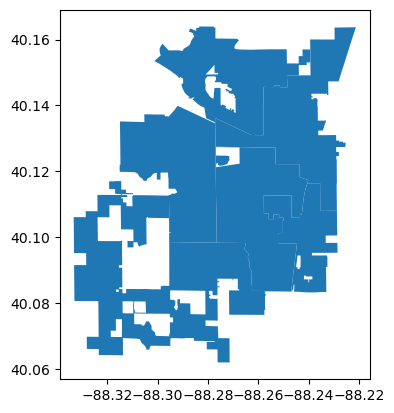

In [5]:
gdf_councils.plot()

### make fancier plots with matplotlib:

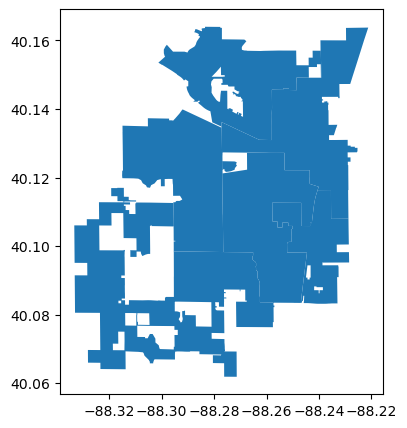

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

plt.show()

### plot out boundaries of regions:

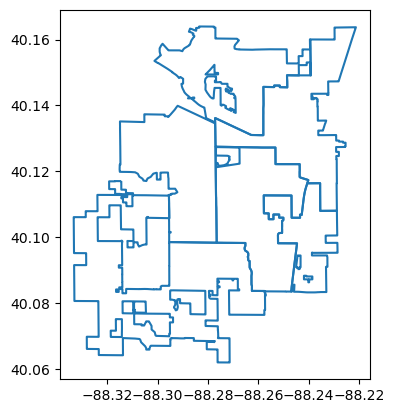

In [7]:
gdf_councils.boundary.plot()

### get the bounding boxes for each council district:

In [8]:
gdf_councils.bounds

minx       miny       maxx       maxy
0 -88.333303  40.061894 -88.257012  40.116995
1 -88.315071  40.098268 -88.239120  40.163956
2 -88.277158  40.107938 -88.221225  40.163721
3 -88.276971  40.083257 -88.240119  40.127432
4 -88.257818  40.083182 -88.228505  40.116346

### find the centers of each of each specific shape:

In [9]:
gdf_councils.centroid # ignoring .to_crs() error for now

/var/folders/qt/_0bv3pr14c97mcyg8fc554bm0000gn/T/ipykernel_13407/1666737993.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_councils.centroid # ignoring .to_crs() error for now


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [10]:
gdf_councils.crs # CRS = Coordinate Reference System

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Use geopandas to overplot data. Overlay the trees owned by Champaign:
Source: https://gis-cityofchampaign.opendata.arcgis.com/datasets/cityofchampaign::city-owned-trees/explore

In [11]:
gdf_trees = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/22/query?outFields=*&where=1%3D1&f=geojson')

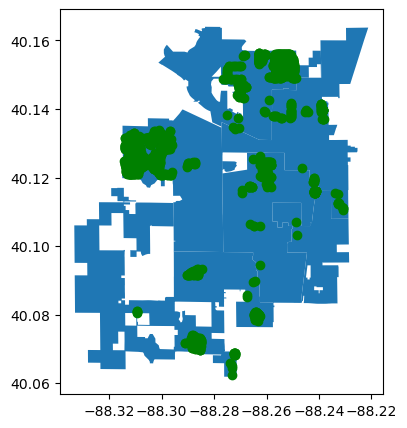

In [12]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

gdf_trees.plot(ax=ax, color='green')

plt.show()

### zoom in to where trees are densely owned by city of Champaign

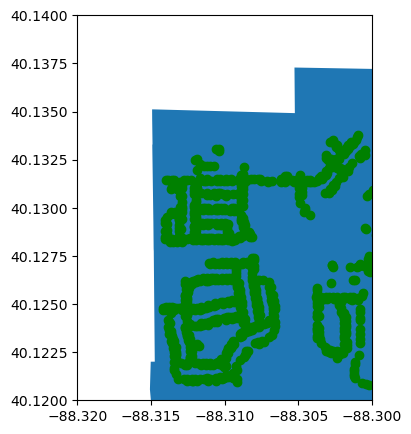

In [13]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

gdf_trees.plot(ax=ax, color='green')

ax.set_xlim(-88.32, -88.30)
ax.set_ylim(40.12, 40.14)

plt.show()

### get tree family data

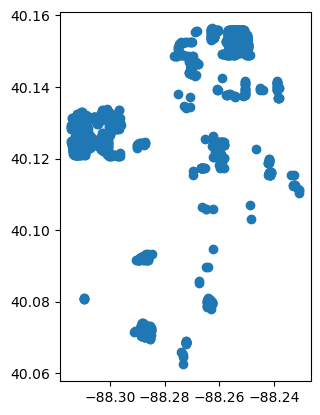

In [14]:
gdf_trees.plot()

What can we color by?

In [15]:
gdf_trees.head()

OBJECTID  ID            UNIQUEID ADDRESS     STREET      ONSTR  \
0         1   1  RdG 20110912130753    3201   NOBEL DR  NEWTON DR   
1         2   2  RdG 20110912131028     802  NEWTON DR  NEWTON DR   
2         3   3  RdG 20110912131411     801  NEWTON DR  NEWTON DR   
3         4   4  RdG 20110912130650    3201   NOBEL DR  NEWTON DR   
4         5   5  RdG 20110912130921     802  NEWTON DR  NEWTON DR   

          FROMSTR           TOSTR       SIDE SITE  ... NOTES FACILITYID  \
0        NOBEL DR  N PROSPECT AVE  Side Away    2  ...                1   
1        NOBEL DR  N PROSPECT AVE      Front    2  ...                2   
2  N PROSPECT AVE        NOBEL DR      Front    3  ...                3   
3        NOBEL DR  N PROSPECT AVE  Side Away    1  ...                4   
4        NOBEL DR  N PROSPECT AVE      Front    1  ...                5   

   SECTION  Special_Status    FAMILY Staked_Status Proprietary_ID  \
0      36N            None  Fagaceae          None              1   
1      36N  Share the Cost  Fagaceae          None              2   
2      36N            None                    None              3   
3      36N            None  Fagaceae          None              4   
4      36N  Share the Cost  Fagaceae          None              5   

  HydrationMat_Status HydrationBag_Status                    geometry  
0                None                None  POINT (-88.25709 40.15272)  
1                None                None  POINT (-88.25751 40.15273)  
2                None                None  POINT (-88.25731 40.15261)  
3                None                None  POINT (-88.25690 40.15273)  
4                None                None  POINT (-88.25731 40.15273)  

[5 rows x 33 columns]

How about by the number of sites?

In [16]:
gdf_trees['SITE'].unique()

array(['2', '3', '1', '5', '4', '11', '6', '7', '8', '9', '10', '12',
       '13', '14', '15', '16', '29', '30', '31', '17', '18', '19', '20',
       '22', '23', '21', '24', '25', '26', '27', '28'], dtype=object)

Let's clean out the None's and give them a value of 0:

In [17]:
#gdf_apts['Stories'][gdf_apts['Stories'].isnull()] = '0' # ignorning warnings
# or, doing it a more pandas way:
gdf_trees.loc[gdf_trees['SITE'].isnull(), 'SITE'] = '0'

In [18]:
gdf_trees['SITE'].unique()

array(['2', '3', '1', '5', '4', '11', '6', '7', '8', '9', '10', '12',
       '13', '14', '15', '16', '29', '30', '31', '17', '18', '19', '20',
       '22', '23', '21', '24', '25', '26', '27', '28'], dtype=object)

It looks like we also have some "empties" - let's change those to zeros as well:

In [19]:
#gdf_apts['Stories'][gdf_apts['Stories']==' '] = '0'
gdf_trees.loc[gdf_trees['SITE']==' ', 'SITE'] = '0'

In [20]:
gdf_trees['SITE'].unique()

array(['2', '3', '1', '5', '4', '11', '6', '7', '8', '9', '10', '12',
       '13', '14', '15', '16', '29', '30', '31', '17', '18', '19', '20',
       '22', '23', '21', '24', '25', '26', '27', '28'], dtype=object)

We also have some repeated "4"'s but this will be fine once we turn them into integers.  Finally, let's turn these floors into numbers:

In [21]:
gdf_trees['SITE'] = pd.to_numeric(gdf_trees['SITE'], errors='coerce')

In [22]:
gdf_trees['SITE'].unique()

array([ 2,  3,  1,  5,  4, 11,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 29,
       30, 31, 17, 18, 19, 20, 22, 23, 21, 24, 25, 26, 27, 28])

### make a histogram to see what "SITE" looks like:

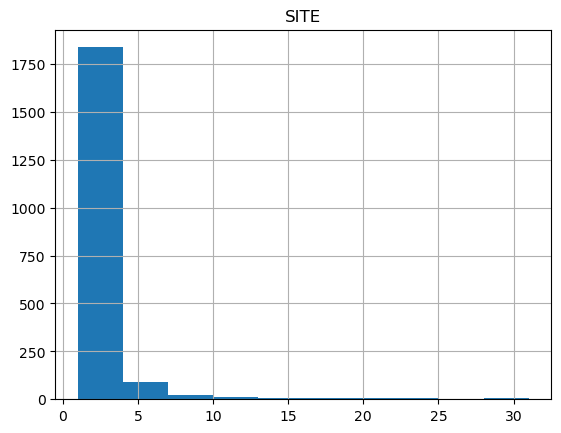

In [23]:
gdf_trees.hist(column='SITE')
plt.show()

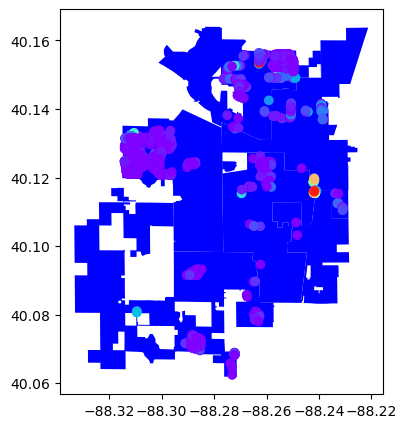

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
gdf_councils.plot(ax=ax, color="blue")
gdf_trees.plot(column='SITE', ax=ax, cmap='rainbow')

#ax.set_xlim(-88.35, -88.2)
#ax.set_ylim(40, 40.2)
plt.show()

Zoomed in:

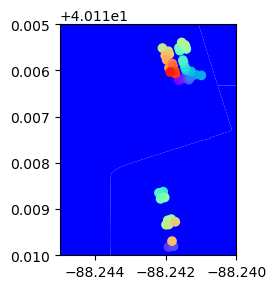

In [25]:
fig, ax = plt.subplots(figsize=(3,3))
gdf_councils.plot(ax=ax, color="blue")
gdf_trees.plot(column='SITE', ax=ax, cmap='rainbow')

ax.set_xlim(-88.245, -88.240)
ax.set_ylim(40.120, 40.115)

plt.show()

### try to plot "FAMILY" (categorical data)

In [26]:
gdf_trees.head()

OBJECTID  ID            UNIQUEID ADDRESS     STREET      ONSTR  \
0         1   1  RdG 20110912130753    3201   NOBEL DR  NEWTON DR   
1         2   2  RdG 20110912131028     802  NEWTON DR  NEWTON DR   
2         3   3  RdG 20110912131411     801  NEWTON DR  NEWTON DR   
3         4   4  RdG 20110912130650    3201   NOBEL DR  NEWTON DR   
4         5   5  RdG 20110912130921     802  NEWTON DR  NEWTON DR   

          FROMSTR           TOSTR       SIDE  SITE  ... NOTES FACILITYID  \
0        NOBEL DR  N PROSPECT AVE  Side Away     2  ...                1   
1        NOBEL DR  N PROSPECT AVE      Front     2  ...                2   
2  N PROSPECT AVE        NOBEL DR      Front     3  ...                3   
3        NOBEL DR  N PROSPECT AVE  Side Away     1  ...                4   
4        NOBEL DR  N PROSPECT AVE      Front     1  ...                5   

   SECTION  Special_Status    FAMILY Staked_Status Proprietary_ID  \
0      36N            None  Fagaceae          None              1   
1      36N  Share the Cost  Fagaceae          None              2   
2      36N            None                    None              3   
3      36N            None  Fagaceae          None              4   
4      36N  Share the Cost  Fagaceae          None              5   

  HydrationMat_Status HydrationBag_Status                    geometry  
0                None                None  POINT (-88.25709 40.15272)  
1                None                None  POINT (-88.25751 40.15273)  
2                None                None  POINT (-88.25731 40.15261)  
3                None                None  POINT (-88.25690 40.15273)  
4                None                None  POINT (-88.25731 40.15273)  

[5 rows x 33 columns]

In [27]:
gdf_trees['FAMILY'].unique()

array(['Fagaceae', '', 'Aceraceae', None, 'Malvaceae', 'Ulmaceae',
       'Ginkgoaceae', 'Hippocastanaceae', 'Fabaceae', 'Magnoliaceae',
       'Cupressaceae', 'Altingiaceae', 'Oleaceae', 'Betulaceae',
       'Cercidiphyllaceae', 'Nyssaceae', 'Rosaceae', 'Platanaceae',
       'Pinaceae', 'Rutaceae', 'Eucommiaceae', 'Styracaceae',
       'Unknown Tree', 'Moraceae', 'Cornaceae', 'Bignoniaceae'],
      dtype=object)

In [28]:
gdf_trees.loc[gdf_trees['FAMILY']=='', 'FAMILY'] = 'Not specified'
gdf_trees.loc[gdf_trees['FAMILY']==0, 'FAMILY'] = 'Not specified'

In [29]:
gdf_trees['FAMILY'].unique()

array(['Fagaceae', 'Not specified', 'Aceraceae', None, 'Malvaceae',
       'Ulmaceae', 'Ginkgoaceae', 'Hippocastanaceae', 'Fabaceae',
       'Magnoliaceae', 'Cupressaceae', 'Altingiaceae', 'Oleaceae',
       'Betulaceae', 'Cercidiphyllaceae', 'Nyssaceae', 'Rosaceae',
       'Platanaceae', 'Pinaceae', 'Rutaceae', 'Eucommiaceae',
       'Styracaceae', 'Unknown Tree', 'Moraceae', 'Cornaceae',
       'Bignoniaceae'], dtype=object)

### plot with "(tree) family"!  

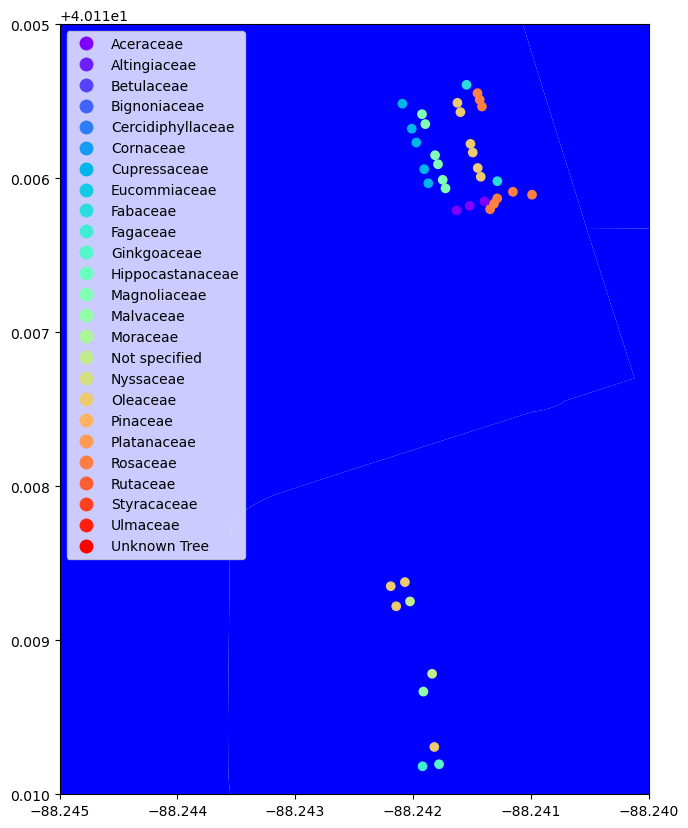

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_councils.plot(ax=ax, color="blue")
gdf_trees.plot(column='FAMILY', ax=ax, cmap='rainbow', categorical=True, legend=True)

ax.set_xlim(-88.245, -88.240)
ax.set_ylim(40.120, 40.115)
plt.show()

## Geopandas + contextily

In [31]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
gdf_councils

OBJECTID_1 District        Council_me   ShapeSTArea  ShapeSTLength  \
0         811        5   Vanna Pianfetti  1.838498e+08  211060.175261   
1         812        3    Daniel Iniguez  2.009197e+08  144362.359386   
2         813        1   Davion Williams  1.078965e+08   83420.727939   
3         814        4  Michael Foellmer  1.049800e+08   77363.320814   
4         815        2       Alicia Beck  5.164512e+07   62243.277115   

                                            geometry  
0  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

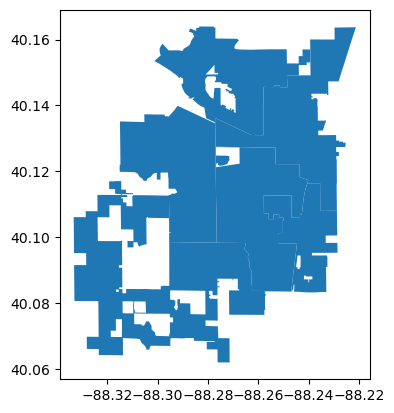

In [32]:
gdf_councils.plot()

In [33]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### transform to a lat/long representation with:

In [34]:
gdf_councils2 = gdf_councils.to_crs(epsg=4326)

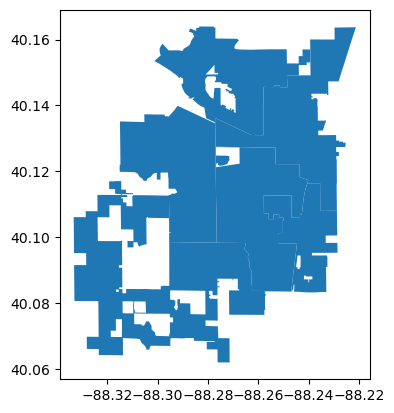

In [35]:
gdf_councils2.plot()

### using `contextily` 

In [36]:
import contextily as ctx

### transform our geometric dataset into the Web Mercator projection:

In [37]:
gdf_councils3 = gdf_councils.to_crs(epsg=3857)

In [38]:
gdf_councils3.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### plot our Champaign data on our own axis:

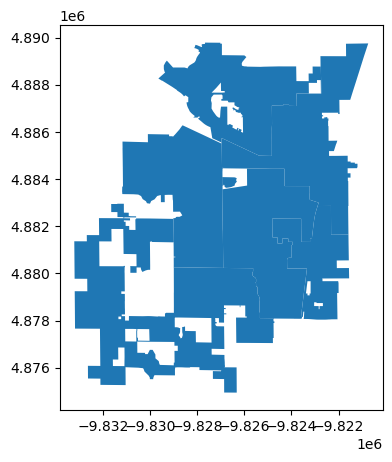

In [39]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils3.plot(ax=ax)

plt.show()

### add a basemap using `contextily`:

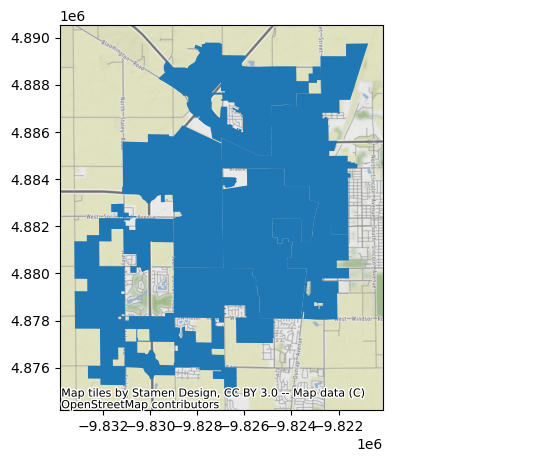

In [40]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
gdf_councils3.plot(ax=ax)
ctx.add_basemap(ax=ax)
plt.show()

### plot a little see-through so we can see the basemap underneath:

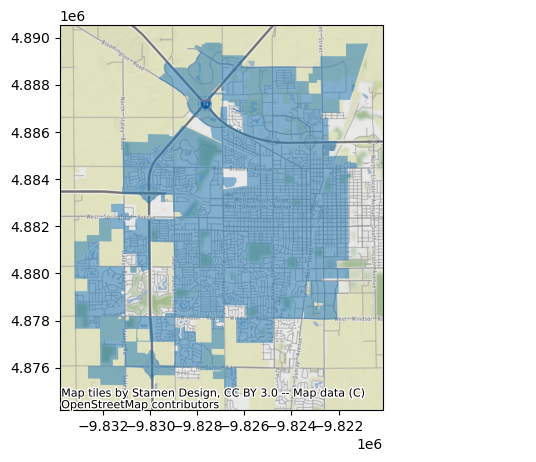

In [41]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
gdf_councils3.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)
plt.show()

### add in a black outline for our borows:

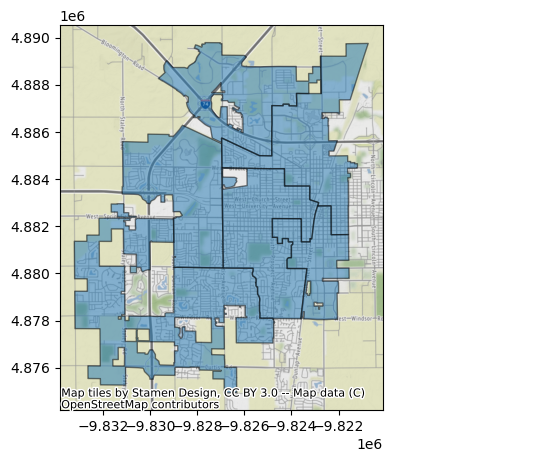

In [42]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils3.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs = gdf_councils3.crs)

plt.show()

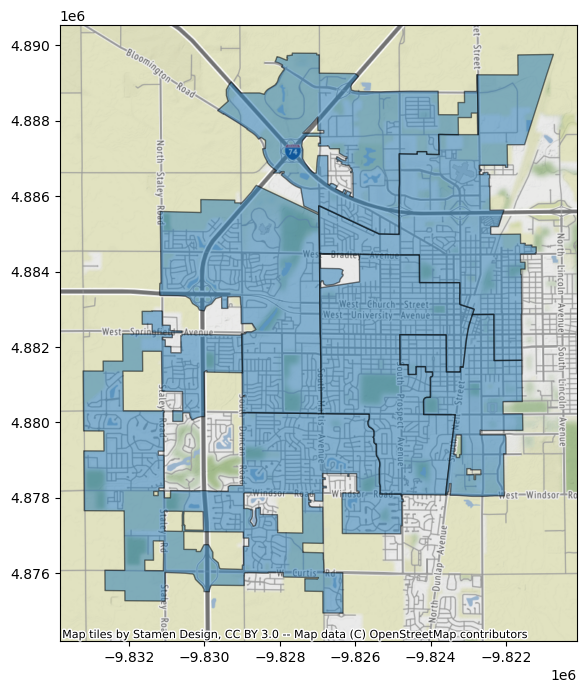

In [43]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils3.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

In [44]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
# re-read

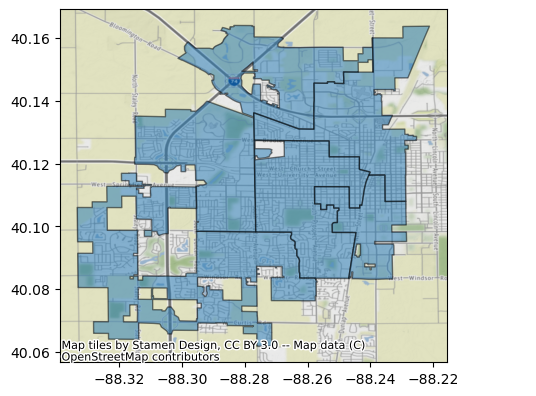

In [45]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
# here, you might get an error and can try:
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

### add on some more layers to this map -- trees dataset from the champaign webpage:
Source: https://gis-cityofchampaign.opendata.arcgis.com/datasets/cityofchampaign::city-owned-trees/explore

In [46]:
gdf_trees = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/22/query?outFields=*&where=1%3D1&f=geojson')

In [47]:
gdf_trees.head()

OBJECTID  ID            UNIQUEID ADDRESS     STREET      ONSTR  \
0         1   1  RdG 20110912130753    3201   NOBEL DR  NEWTON DR   
1         2   2  RdG 20110912131028     802  NEWTON DR  NEWTON DR   
2         3   3  RdG 20110912131411     801  NEWTON DR  NEWTON DR   
3         4   4  RdG 20110912130650    3201   NOBEL DR  NEWTON DR   
4         5   5  RdG 20110912130921     802  NEWTON DR  NEWTON DR   

          FROMSTR           TOSTR       SIDE SITE  ... NOTES FACILITYID  \
0        NOBEL DR  N PROSPECT AVE  Side Away    2  ...                1   
1        NOBEL DR  N PROSPECT AVE      Front    2  ...                2   
2  N PROSPECT AVE        NOBEL DR      Front    3  ...                3   
3        NOBEL DR  N PROSPECT AVE  Side Away    1  ...                4   
4        NOBEL DR  N PROSPECT AVE      Front    1  ...                5   

   SECTION  Special_Status    FAMILY Staked_Status Proprietary_ID  \
0      36N            None  Fagaceae          None              1   
1      36N  Share the Cost  Fagaceae          None              2   
2      36N            None                    None              3   
3      36N            None  Fagaceae          None              4   
4      36N  Share the Cost  Fagaceae          None              5   

  HydrationMat_Status HydrationBag_Status                    geometry  
0                None                None  POINT (-88.25709 40.15272)  
1                None                None  POINT (-88.25751 40.15273)  
2                None                None  POINT (-88.25731 40.15261)  
3                None                None  POINT (-88.25690 40.15273)  
4                None                None  POINT (-88.25731 40.15273)  

[5 rows x 33 columns]

In [48]:
gdf_trees['FAMILY'].unique()

array(['Fagaceae', '', 'Aceraceae', None, 'Malvaceae', 'Ulmaceae',
       'Ginkgoaceae', 'Hippocastanaceae', 'Fabaceae', 'Magnoliaceae',
       'Cupressaceae', 'Altingiaceae', 'Oleaceae', 'Betulaceae',
       'Cercidiphyllaceae', 'Nyssaceae', 'Rosaceae', 'Platanaceae',
       'Pinaceae', 'Rutaceae', 'Eucommiaceae', 'Styracaceae',
       'Unknown Tree', 'Moraceae', 'Cornaceae', 'Bignoniaceae'],
      dtype=object)

### replace null to non specified

In [49]:
gdf_trees.loc[gdf_trees['FAMILY'].isnull(), 'FAMILY'] = 'Not specified'

In [50]:
gdf_trees['FAMILY'].unique()

array(['Fagaceae', '', 'Aceraceae', 'Not specified', 'Malvaceae',
       'Ulmaceae', 'Ginkgoaceae', 'Hippocastanaceae', 'Fabaceae',
       'Magnoliaceae', 'Cupressaceae', 'Altingiaceae', 'Oleaceae',
       'Betulaceae', 'Cercidiphyllaceae', 'Nyssaceae', 'Rosaceae',
       'Platanaceae', 'Pinaceae', 'Rutaceae', 'Eucommiaceae',
       'Styracaceae', 'Unknown Tree', 'Moraceae', 'Cornaceae',
       'Bignoniaceae'], dtype=object)

### replace empty values and zeros to non specified

In [51]:
gdf_trees.loc[gdf_trees['FAMILY']=='', 'FAMILY'] = 'Not specified'
gdf_trees.loc[gdf_trees['FAMILY']==0, 'FAMILY'] = 'Not specified'

In [52]:
gdf_trees['FAMILY'].unique()

array(['Fagaceae', 'Not specified', 'Aceraceae', 'Malvaceae', 'Ulmaceae',
       'Ginkgoaceae', 'Hippocastanaceae', 'Fabaceae', 'Magnoliaceae',
       'Cupressaceae', 'Altingiaceae', 'Oleaceae', 'Betulaceae',
       'Cercidiphyllaceae', 'Nyssaceae', 'Rosaceae', 'Platanaceae',
       'Pinaceae', 'Rutaceae', 'Eucommiaceae', 'Styracaceae',
       'Unknown Tree', 'Moraceae', 'Cornaceae', 'Bignoniaceae'],
      dtype=object)

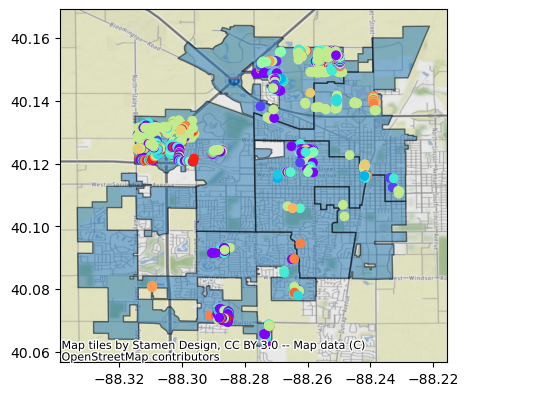

In [53]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_trees.plot(column='FAMILY', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

### zoom into where tree are densely owned by Champaign

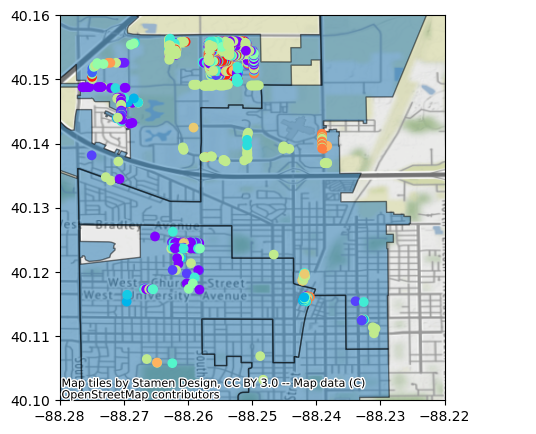

In [54]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_trees.plot(column='FAMILY', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

ax.set_xlim(-88.28, -88.22)
ax.set_ylim(40.10, 40.16)

plt.show()

## ping `contextily`, we get a less fuzzy map!

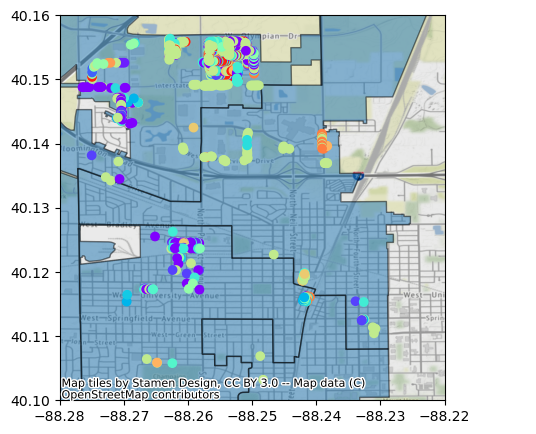

In [55]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.set_xlim(-88.28, -88.22)
ax.set_ylim(40.10, 40.16)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_trees.plot(column='FAMILY', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

### add a legend:

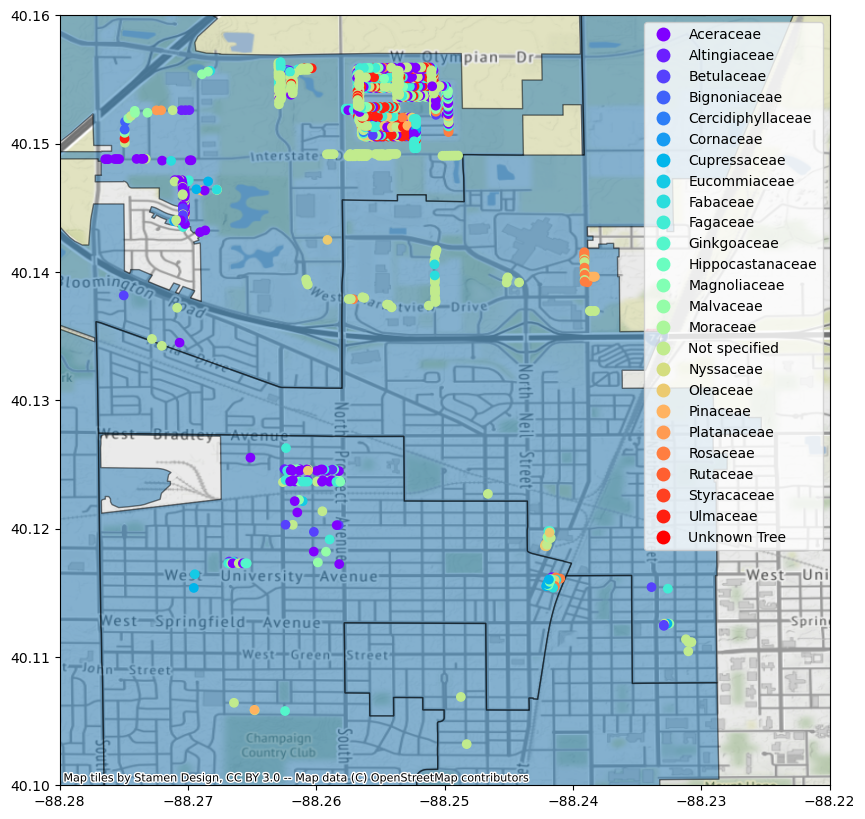

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.set_xlim(-88.28, -88.22)
ax.set_ylim(40.10, 40.16)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_trees.plot(column='FAMILY', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

## Geopandas + contextily + ipywidgets

In [57]:
import ipywidgets

In [58]:
# 1. hardcode a plotting option

treetype = 'Rosaceae'

gdf_trees.loc[gdf_trees['FAMILY']==treetype].head() # our subsetted dataframe


OBJECTID   ID            UNIQUEID ADDRESS             STREET  \
187       194  213  RdG 20110912153216     509         BARDEEN LN   
224       232  251  RdG 20111209110024    3302    CHERRY HILLS DR   
225       233  252  RdG 20111209110058    3302    CHERRY HILLS DR   
299       309  329  RdG 20111212111034    3209  WEEPING CHERRY DR   
383       394  442   BB 20111118083125    1102        STERLING DR   

                 ONSTR           FROMSTR           TOSTR     SIDE SITE  ...  \
187         BARDEEN LN          NOBEL DR      TOALSON LN    Front    1  ...   
224    CHERRY HILLS DR  CYPRESS CREEK RD  PINE VALLEY DR    Front    2  ...   
225    CHERRY HILLS DR  CYPRESS CREEK RD  PINE VALLEY DR    Front    3  ...   
299  WEEPING CHERRY DR      PINEHURST DR  PINE VALLEY DR   Median   12  ...   
383           GALEN DR       WILSHIRE CT     STERLING DR  Side To    1  ...   

    NOTES FACILITYID  SECTION  Special_Status    FAMILY     Staked_Status  \
187              202      36N  Share the Cost  Rosaceae              None   
224              240      27S            None  Rosaceae              None   
225              241      27S            None  Rosaceae              None   
299              318      27S            None  Rosaceae              None   
383              409      26S            None  Rosaceae  Staked 2021 Fall   

    Proprietary_ID HydrationMat_Status HydrationBag_Status  \
187            194                None                None   
224            232                None                None   
225            233                None                None   
299            309                None                None   
383            394                None                None   

                       geometry  
187  POINT (-88.25326 40.15202)  
224  POINT (-88.29102 40.07165)  
225  POINT (-88.29098 40.07169)  
299  POINT (-88.28855 40.07286)  
383  POINT (-88.26436 40.07841)  

[5 rows x 33 columns]

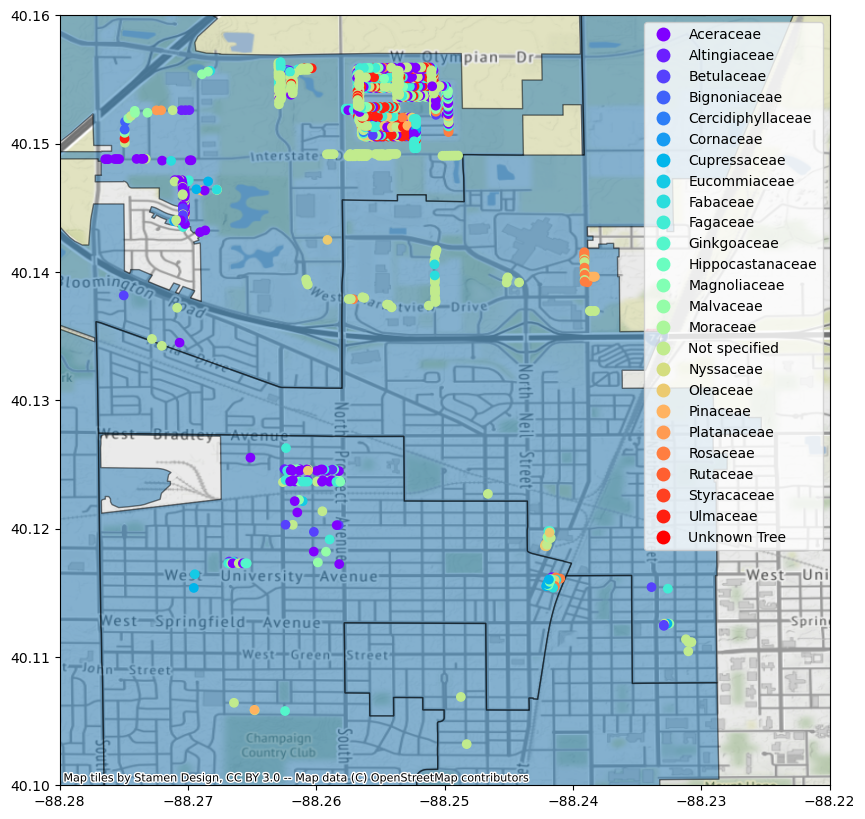

In [59]:
treetype = 'Rosaceae'

gdf_trees_subset = gdf_trees.loc[gdf_trees['FAMILY']==treetype] # our subsetted dataframe


fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.set_xlim(-88.28, -88.22)
ax.set_ylim(40.10, 40.16)


gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_trees.plot(column='FAMILY', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

2. We make this into a function an have our "hard coded" parameter as an input:

In [60]:
gdf_trees.columns

Index(['OBJECTID', 'ID', 'UNIQUEID', 'ADDRESS', 'STREET', 'ONSTR', 'FROMSTR',
       'TOSTR', 'SIDE', 'SITE', 'SPP', 'COMMON', 'DBH', 'TRUNKS', 'COND', 'MT',
       'GROW', 'OBSERVE', 'LOCTYPE', 'CULTIVAR', 'TREETYPE', 'INV_DATE',
       'INSPECT_DT', 'NOTES', 'FACILITYID', 'SECTION', 'Special_Status',
       'FAMILY', 'Staked_Status', 'Proprietary_ID', 'HydrationMat_Status',
       'HydrationBag_Status', 'geometry'],
      dtype='object')

In [61]:
gdf_trees['DBH'] = gdf_trees['DBH'].replace(np.nan, 0)
gdf_trees['DBH']

0        8.0
1        3.0
2        0.0
3        6.0
4        3.0
        ... 
1995    15.0
1996     9.0
1997    15.0
1998     2.0
1999     5.0
Name: DBH, Length: 2000, dtype: float64

In [62]:
gdf_trees['OBJECTID'] = gdf_trees['OBJECTID'] / 1.0 #making int into float

In [63]:
gdf_trees['OBJECTID']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
1995    2038.0
1996    2039.0
1997    2040.0
1998    2041.0
1999    2042.0
Name: OBJECTID, Length: 2000, dtype: float64

In [64]:
#treetype = 'Rosaceae'

def my_geopandas_plot(treetype):
    gdf_trees_subset = gdf_trees.loc[gdf_trees['FAMILY']==treetype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(5,5))

    ax.set_xlim(-88.28, -88.22)
    ax.set_ylim(40.10, 40.16)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_trees_subset.plot(column='FAMILY', ax=ax, cmap='rainbow', categorical=True, legend=True)


    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

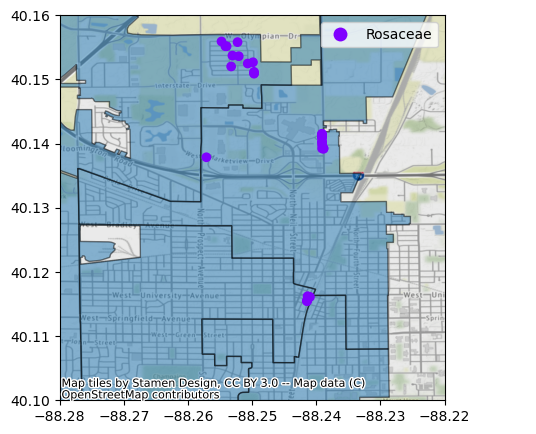

In [65]:
my_geopandas_plot('Rosaceae')

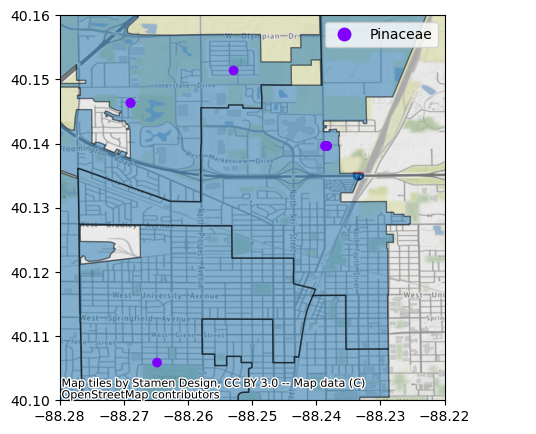

In [66]:
my_geopandas_plot('Pinaceae')

### use `@ipywidgets.interact` to make this interactive:

In [67]:
from matplotlib.lines import Line2D
markersDict = Line2D.markers
markersDict.keys()
markers = []
for m in markersDict:
    if 'None' not in str(m) and len(str(m).strip())>0:
        markers.append(m)
markers[:10]

['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3']

In [68]:
gdf_color_var_subset = ['DBH', 'OBJECTID']

In [69]:
gdf_color_var_subset

['DBH', 'OBJECTID']

In [70]:
treetype = 'FAMILY'

gdf_trees_subset = gdf_trees.loc[gdf_trees['FAMILY']==treetype] # our subsetted dataframe

In [71]:
#3. decorate our function with an ipywidgets.interact

@ipywidgets.interact(treetype=gdf_trees['FAMILY'].unique(),
                    marker = markers)
def my_geopandas_plot(treetype, marker):
    gdf_trees_subset = gdf_trees.loc[gdf_trees['FAMILY']==treetype] # our subsetted dataframe
    
    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.28, -88.22)
    ax.set_ylim(40.10, 40.16)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_trees_subset.plot(column='FAMILY', ax=ax, marker = marker, cmap='rainbow', categorical=True, legend=True)
    #gdf_trees_subset.plot(cmap='rainbow')

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
    plt.show()

interactive(children=(Dropdown(description='treetype', options=('Fagaceae', 'Not specified', 'Aceraceae', 'Mal…

# Write-ups

Please include 1-2 paragraphs explaining your visualization and the user interaction that you are implementing:

### What are you trying to show? 
I'm try to show families of tree owned by Champaign and visualize where trees are densely owned by the city of Champaign

### What projection are you using and why?
This map is plotted using CRS - coordinate reference system (Web Mercator) because I like how simple it is to reflect the two-dimensional map. This is related to real places on the earth by plotting a map made of a collection of coordinates in an arbitrary space. 

### What did you find interesting? 
I found it interesting that quite amount of trees are not specified. Perhaps some trees look alike!?

### Who do you think would be interested in using this visualization? 
For someone who is really into forestry might be interested to know what families of tree do city of Champaign owned. For example, as a non-forestry-major student as myself, I would be interested in getting to know the reasons for city planning department to plant trees, e.g., urban planning, landscape planning etc. 

## Reference

**used code from class:**

https://gis-cityofchampaign.opendata.arcgis.com/datasets/cityofchampaign::city-owned-trees/explore

https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek07%2Fprep_notebook_week07.ipynb

https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek04%2Fprep_notebook_week04.ipynb